In [1]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt; plt.rc('font', size=14)
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

[DEBUG] Using default logger (stdout, stderr).


In [2]:
# cmap3 = ['#1b44ffff', '#ff3508ff', '#90b400ff']
cmap3 = ['#016bff', '#b91f1c', '#308937']
Species = ['B_caccae', 'B_cellulosilyticus_WH2', 'B_vulgatus']
sp_order = ['B_cellulosilyticus_WH2', 'B_caccae', 'B_vulgatus']
names = ['$B. caccae$', '$B. cellulosilyticus$', '$B. vulgatus$']
order = ['$B. cellulosilyticus$', '$B. caccae$', '$B. vulgatus$']

# Data preparation

In [3]:
relative_abundance = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='Relative_abundance')
relative_abundance = relative_abundance.melt(id_vars=['Day', 'Species'], var_name='Mouse', value_name='Relative_abundance')
relative_abundance['Mouse'] = relative_abundance['Mouse'].str.replace('M', '').astype(int)
relative_abundance['Day'] = relative_abundance['Day'].replace(0.3, 0)
relative_abundance

,Day,Species,Mouse,Relative_abundance
0,0.0,B_cellulosilyticus_WH2,1,0.188275
1,1.0,B_cellulosilyticus_WH2,1,0.231989
2,2.0,B_cellulosilyticus_WH2,1,0.457797
3,3.0,B_cellulosilyticus_WH2,1,0.510393
4,4.0,B_cellulosilyticus_WH2,1,0.490595
...,...,...,...,...
814,33.0,B_vulgatus,12,0.215526
815,34.0,B_vulgatus,12,0.196795
816,35.0,B_vulgatus,12,0.156571
817,36.0,B_vulgatus,12,0.161385


In [4]:
relative_abundance_mean_for_plot = relative_abundance.loc[:, ['Day', 'Species', 'Relative_abundance']]. \
    groupby(['Day', 'Species']). \
    mean(). \
    reset_index()
relative_abundance_mean_for_plot

,Day,Species,Relative_abundance
0,0.0,B_caccae,0.691410
1,0.0,B_cellulosilyticus_WH2,0.167193
2,0.0,B_vulgatus,0.141396
3,1.0,B_caccae,0.506390
4,1.0,B_cellulosilyticus_WH2,0.229546
...,...,...,...
112,36.0,B_cellulosilyticus_WH2,0.288622
113,36.0,B_vulgatus,0.175274
114,37.0,B_caccae,0.534249
115,37.0,B_cellulosilyticus_WH2,0.227801


In [5]:
relative_abundance_std_for_plot = relative_abundance.loc[:, ['Day', 'Species', 'Relative_abundance']]. \
    groupby(['Day', 'Species']). \
    std(). \
    reset_index()
relative_abundance_std_for_plot

,Day,Species,Relative_abundance
0,0.0,B_caccae,0.068671
1,0.0,B_cellulosilyticus_WH2,0.027847
2,0.0,B_vulgatus,0.051141
3,1.0,B_caccae,0.051695
4,1.0,B_cellulosilyticus_WH2,0.023513
...,...,...,...
112,36.0,B_cellulosilyticus_WH2,0.056228
113,36.0,B_vulgatus,0.023139
114,37.0,B_caccae,0.021858
115,37.0,B_cellulosilyticus_WH2,0.046396


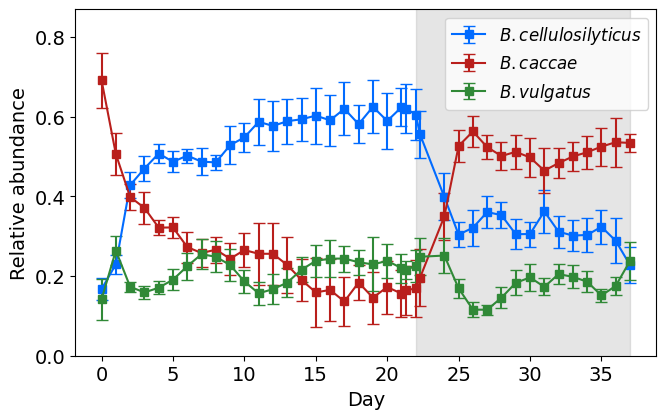

In [6]:
plt.figure(figsize=(7.5, 4.5))
c=0
for s in sp_order:
    plt.errorbar(relative_abundance_mean_for_plot[relative_abundance_mean_for_plot['Species'] == s]['Day'],
                    relative_abundance_mean_for_plot[relative_abundance_mean_for_plot['Species'] == s]['Relative_abundance'],
                    yerr=relative_abundance_std_for_plot[relative_abundance_std_for_plot['Species'] == s]['Relative_abundance'],
                    fmt='s', capsize=4, label=order[c], linestyle='-', color=cmap3[c], markersize=6, linewidth=1.5)
    c+=1
plt.fill_between(x=[22,37], y1=0, y2=1, color='grey', alpha=0.2)
plt.ylim(0, 0.87)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc=0, fontsize=12)
# plt.legend(loc=0)
plt.xlabel('Day')
plt.ylabel('Relative abundance')
plt.show()

In [7]:
relative_abundance_mean_for_plot_pivoted = relative_abundance_mean_for_plot.pivot_table(index='Day', columns='Species', values='Relative_abundance')
relative_abundance_mean_for_plot_pivoted.columns.name = None
relative_abundance_mean_for_plot_pivoted.columns = names = ['$B. caccae$', '$B. cellulosilyticus$', '$B. vulgatus$']
relative_abundance_mean_for_plot_pivoted = relative_abundance_mean_for_plot_pivoted.loc[:,order]
relative_abundance_mean_for_plot_pivoted

,$B. cellulosilyticus$,$B. caccae$,$B. vulgatus$
Day,,,
0.0,0.167193,0.691410,0.141396
1.0,0.229546,0.506390,0.264064
2.0,0.428292,0.398519,0.173189
3.0,0.469967,0.371193,0.158840
4.0,0.507598,0.321644,0.170758
5.0,0.486992,0.322084,0.190924
6.0,0.502462,0.272784,0.224754
7.0,0.487237,0.257833,0.254931
8.0,0.485412,0.266168,0.248420


In [8]:
relative_abundance_std_for_plot_pivoted = relative_abundance_std_for_plot.pivot_table(index='Day', columns='Species', values='Relative_abundance')
relative_abundance_std_for_plot_pivoted.columns.name = None
relative_abundance_std_for_plot_pivoted.columns = names = ['$B. caccae$', '$B. cellulosilyticus$', '$B. vulgatus$']
relative_abundance_std_for_plot_pivoted = relative_abundance_std_for_plot_pivoted.loc[:,order]
relative_abundance_std_for_plot_pivoted

,$B. cellulosilyticus$,$B. caccae$,$B. vulgatus$
Day,,,
0.0,0.027847,0.068671,0.051141
1.0,0.023513,0.051695,0.037479
2.0,0.031978,0.033513,0.013080
3.0,0.031795,0.039257,0.016319
4.0,0.024293,0.018253,0.015720
5.0,0.026253,0.027323,0.026822
6.0,0.017317,0.038791,0.033458
7.0,0.034188,0.035378,0.037960
8.0,0.018178,0.032711,0.038594


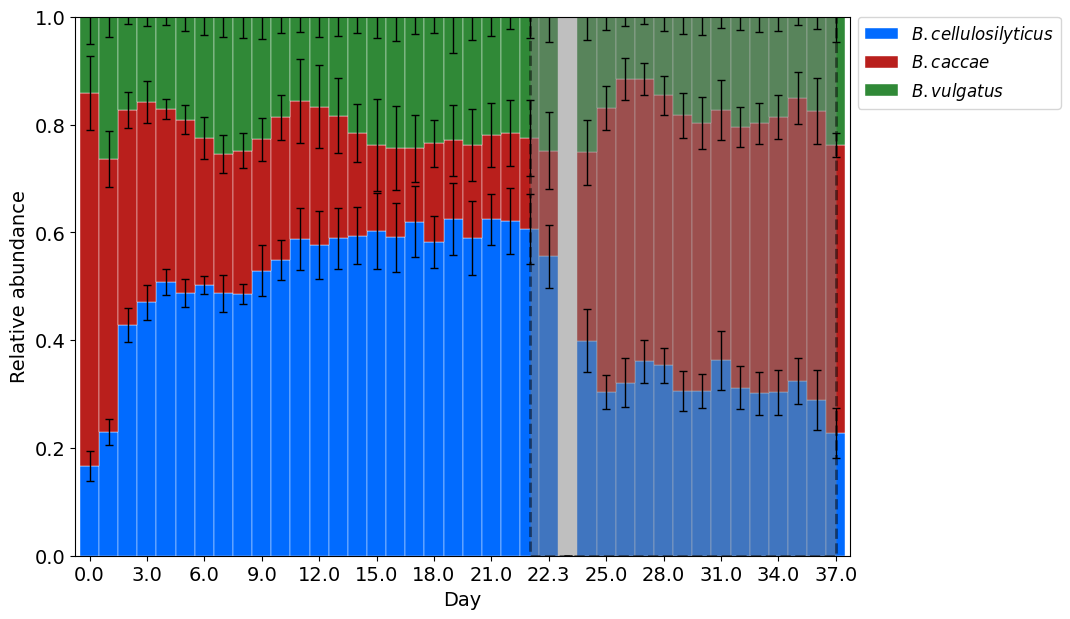

In [9]:
# def plot_relative_abundance(reads, dataset='LF0', complete_days=False, pretty_names=True, std=True, legend=True, figsize=(10, 7), ax=None, save_f=None):
#     # Pretty names
#     reads = reads.copy()
#     if pretty_names:
#         reads['name'] = reads['name'].replace(pretty_names_dir)
#         ordering = pretty_order
#     reads_mean, reads_std = parse_reads(reads, ordering=ordering)
#     if complete_days:
for day in np.arange(0, 37+1):
    if day not in relative_abundance_mean_for_plot_pivoted.index:
        relative_abundance_mean_for_plot_pivoted.loc[day] = 0
        relative_abundance_std_for_plot_pivoted.loc[day] = 0
relative_abundance_mean_for_plot_pivoted.sort_index(inplace=True)
relative_abundance_std_for_plot_pivoted.sort_index(inplace=True)
    # If std is False, set it to None
    # if not std:
    #     reads_std = None
    # Get the index of the days to fill
    # if dataset == 'LF0':
    #     fill_indx = [plot_indx for plot_indx, df_indx in enumerate(reads_mean.index) if df_indx in np.arange(13, 27+1)]
    # elif dataset == 'HF0':
    #     fill_indx0 = [plot_indx for plot_indx, df_indx in enumerate(reads_mean.index) if df_indx in np.arange(0, 13+1)]
    #     fill_indx1 = [plot_indx for plot_indx, df_indx in enumerate(reads_mean.index) if df_indx in np.arange(27, 40+1)]
    # Plot
fill_indx = [plot_indx for plot_indx, df_indx in enumerate(relative_abundance_mean_for_plot_pivoted.index) if df_indx in np.arange(22, 37+1)]
# fig, ax = plt.subplots(1, 1, figsize=(10, 7))
relative_abundance_mean_for_plot_pivoted.plot.bar(stacked=True, 
        figsize=(10, 7), 
        width=1, 
        color=cmap3, 
        rot=0, 
        edgecolor='white', 
        linewidth=0.3,
        # ax=ax,
        ylim=(0, 1.01),
        yerr=relative_abundance_std_for_plot_pivoted,
        error_kw={'elinewidth': 1, 'capsize': 3, 'capthick': 1},
        legend='Yuca')
plt.fill_between(x=fill_indx, y1=0, y2=1.01, color='grey', alpha=0.5, edgecolor='black', linewidth=2, linestyle='--')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.xlabel('Day')
plt.ylabel('Relative abundance')
plt.ylim(0, 1)
plt.xticks(np.arange(0, 40+1, 3, dtype=int))
    # if dataset == 'LF0':
    #     ax.fill_between(x=fill_indx, y1=0, y2=1.01, color='grey', alpha=0.5, edgecolor='black', linewidth=2, linestyle='--')
    # elif dataset == 'HF0':
    #     ax.fill_between(x=fill_indx0, y1=0, y2=1.01, color='grey', alpha=0.5, edgecolor='black', linewidth=2, linestyle='--')
    #     ax.fill_between(x=fill_indx1, y1=0, y2=1.01, color='grey', alpha=0.5, edgecolor='black', linewidth=2, linestyle='--')
    # if legend:
    #     ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0., fontsize=12)
    # ax.set_xlabel('Day')
    # if complete_days:
    #     ax.set_xticks(np.arange(0, 40+1, 2))
    # ax.set_ylabel('Relative abundance')
    # if save_f is not None:
    #     fig.savefig(f'{save_f}', bbox_inches='tight')
    # return fig, ax
plt.show()

In [10]:
dna_yields = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='DNA_yields')
dna_yields = dna_yields.melt(id_vars=['Day'], var_name='Mouse', value_name='DNA_yields')
dna_yields['Mouse'] = dna_yields['Mouse'].str.replace('M', '').astype(int)
dna_yields['Day'] = dna_yields['Day'].replace(0.3, 0)
dna_yields

,Day,Mouse,DNA_yields
0,0.0,1,11.516241
1,1.0,1,125.019172
2,2.0,1,437.416874
3,3.0,1,352.361727
4,4.0,1,436.468030
...,...,...,...
268,33.0,12,592.370535
269,34.0,12,781.101560
270,35.0,12,481.996816
271,36.0,12,672.499204


In [11]:
dna_yields_mean_for_plot = dna_yields.loc[:, ['Day', 'DNA_yields']]. \
    groupby(['Day']). \
    mean(). \
    reset_index()
dna_yields_mean_for_plot

,Day,DNA_yields
0,0.0,13.123591
1,1.0,212.270833
2,2.0,502.543601
3,3.0,440.825285
4,4.0,703.473081
5,5.0,633.654979
6,6.0,819.683771
7,7.0,1087.189573
8,8.0,861.663553
9,9.0,904.366160


In [12]:
dna_yields_std_for_plot = dna_yields.loc[:, ['Day', 'DNA_yields']]. \
    groupby(['Day']). \
    std(). \
    reset_index()
dna_yields_std_for_plot

,Day,DNA_yields
0,0.0,10.865671
1,1.0,71.866379
2,2.0,225.143828
3,3.0,132.292756
4,4.0,145.528614
5,5.0,168.292478
6,6.0,155.508593
7,7.0,304.272189
8,8.0,362.339664
9,9.0,237.803259


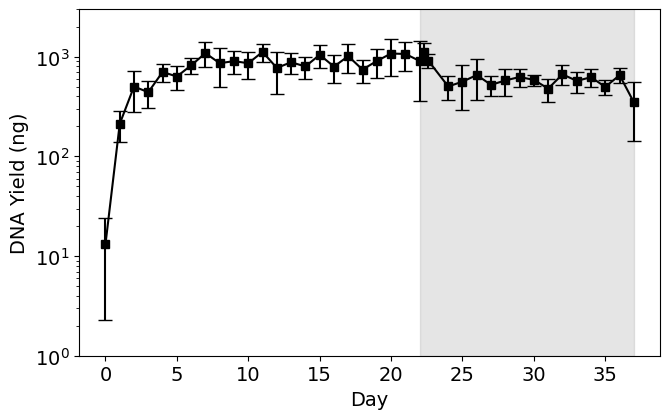

In [13]:
plt.figure(figsize=(7.5, 4.5))
plt.errorbar(dna_yields_mean_for_plot['Day'],
                dna_yields_mean_for_plot['DNA_yields'],
                yerr=dna_yields_std_for_plot['DNA_yields'],
                fmt='s', capsize=5, linestyle='-', color='k')
plt.fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
plt.ylim(1, 3e3)
plt.yscale('log')
plt.xlabel('Day')
plt.ylabel('DNA Yield (ng)')
plt.show()

In [14]:
genome_size = pd.read_excel('reyes-datasets/Reyes_dataExp2_source.xlsx', sheet_name='Genome_size', index_col=0)
genome_size

,Genome_length
Species,
B_caccae,4564814
B_cellulosilyticus_WH2,7082128
B_vulgatus,5163189


In [15]:
N_A = 6.02214076e23 # Avogadro's number
dsDNA_bp = 660 # Average mass of a DNA bp (g/mol)
# unit_conversion = 1e6 # Convert from ug to g
unit_conversion = 1e9 # Convert from ng to g
conversion_factor = N_A/(dsDNA_bp*unit_conversion)
conversion_factor

912445569696.9697

In [16]:
master_table = pd.merge(relative_abundance, genome_size, on='Species')
master_table = pd.merge(master_table, dna_yields, on=['Mouse', 'Day'])
master_table['Day'] = master_table['Day'].replace(0.3, 0)
master_table['Absolute_abundance'] = ((master_table['Relative_abundance']*master_table['DNA_yields'])/master_table['Genome_length'])*conversion_factor
master_table.dropna(inplace=True)
master_table = master_table.loc[:, ['Day', 'Mouse', 'Species', 'Absolute_abundance']]
master_table = master_table[master_table['Absolute_abundance'] > 1e4]
master_table

,Day,Mouse,Species,Absolute_abundance
0,0.0,1,B_cellulosilyticus_WH2,2.793485e+05
1,0.0,1,B_caccae,1.420455e+06
2,0.0,1,B_vulgatus,3.961596e+05
3,1.0,1,B_cellulosilyticus_WH2,3.736692e+06
4,1.0,1,B_caccae,1.205983e+07
...,...,...,...,...
793,36.0,12,B_caccae,8.480705e+07
794,36.0,12,B_vulgatus,1.917977e+07
795,37.0,12,B_cellulosilyticus_WH2,4.946887e+06
796,37.0,12,B_caccae,1.906341e+07


In [17]:
absolute = master_table.groupby(['Day', 'Mouse']).sum().loc[:,['Absolute_abundance']].reset_index()
absolute

,Day,Mouse,Absolute_abundance
0,0.0,1,2.095963e+06
1,0.0,2,5.425034e+06
2,0.0,3,2.427458e+06
3,0.0,10,2.917801e+06
4,0.0,12,4.026486e+06
...,...,...,...
253,37.0,3,1.757892e+07
254,37.0,4,8.492852e+07
255,37.0,10,1.008869e+08
256,37.0,11,3.203041e+07


In [18]:
absolute_mean_for_plot = absolute.loc[:, ['Day', 'Absolute_abundance']]. \
    groupby(['Day']). \
    mean(). \
    reset_index()
absolute_mean_for_plot

,Day,Absolute_abundance
0,0.0,3.378548e+06
1,1.0,3.761416e+07
2,2.0,8.343336e+07
3,3.0,7.187127e+07
4,4.0,1.123428e+08
5,5.0,1.019156e+08
6,6.0,1.303345e+08
7,7.0,1.731417e+08
8,8.0,1.375563e+08
9,9.0,1.416734e+08


In [19]:
absolute_std_for_plot = absolute.loc[:, ['Day', 'Absolute_abundance']]. \
    groupby(['Day']). \
    std(). \
    reset_index()
absolute_std_for_plot

,Day,Absolute_abundance
0,0.0,1.357370e+06
1,1.0,1.254564e+07
2,2.0,3.867150e+07
3,3.0,2.209665e+07
4,4.0,2.266918e+07
5,5.0,2.691895e+07
6,6.0,2.485219e+07
7,7.0,4.836613e+07
8,8.0,5.781376e+07
9,9.0,3.572796e+07


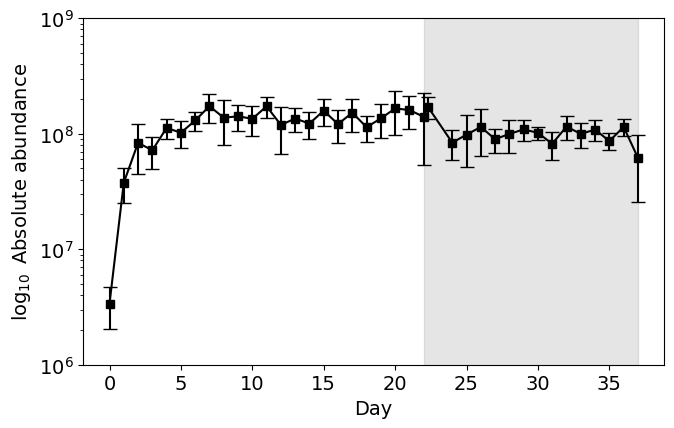

In [20]:
plt.figure(figsize=(7.5, 4.5))
plt.errorbar(absolute_mean_for_plot['Day'],
                absolute_mean_for_plot['Absolute_abundance'],
                yerr=absolute_std_for_plot['Absolute_abundance'],
                fmt='s', capsize=5, linestyle='-', color='k')
plt.fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
plt.ylim(1e6, 1e9)
plt.yscale('log')
plt.xlabel('Day')
plt.ylabel('$\log_{10}$ Absolute abundance')
plt.show()

In [21]:
master_table_mean = master_table.loc[:, ['Day', 'Species', 'Absolute_abundance']]. \
    groupby(['Day', 'Species']). \
        mean(). \
            reset_index()
master_table_mean

,Day,Species,Absolute_abundance
0,0.0,B_caccae,2.466828e+06
1,0.0,B_cellulosilyticus_WH2,4.150167e+05
2,0.0,B_vulgatus,4.967035e+05
3,1.0,B_caccae,2.114932e+07
4,1.0,B_cellulosilyticus_WH2,6.322131e+06
...,...,...,...
109,36.0,B_cellulosilyticus_WH2,2.436759e+07
110,36.0,B_vulgatus,2.027301e+07
111,37.0,B_caccae,3.719805e+07
112,37.0,B_cellulosilyticus_WH2,1.103504e+07


In [22]:
master_table_mean_pivot = master_table_mean.pivot(index='Day', columns='Species', values='Absolute_abundance')
master_table_mean_pivot.columns.name = None
master_table_mean_pivot.to_csv('/home/acs98/Documents/BCEM/Tesis-maestria/masters-thesis/ecological-modeling/reyes-results/master_table_mean_pivot.tsv', sep='\t')
master_table_mean_pivot

,B_caccae,B_cellulosilyticus_WH2,B_vulgatus
Day,,,
0.0,2.466828e+06,4.150167e+05,4.967035e+05
1.0,2.114932e+07,6.322131e+06,1.014271e+07
2.0,4.099073e+07,2.724908e+07,1.519355e+07
3.0,3.319247e+07,2.658016e+07,1.209864e+07
4.0,4.490986e+07,4.622699e+07,2.120595e+07
5.0,4.031648e+07,3.965245e+07,2.194666e+07
6.0,4.498029e+07,5.309711e+07,3.225713e+07
7.0,5.682434e+07,6.880889e+07,4.750851e+07
8.0,4.691671e+07,5.423090e+07,3.640866e+07


In [23]:
master_table_std = master_table.loc[:, ['Day', 'Species', 'Absolute_abundance']]. \
    groupby(['Day', 'Species']). \
        std(). \
            reset_index()
master_table_std

,Day,Species,Absolute_abundance
0,0.0,B_caccae,8.827494e+05
1,0.0,B_cellulosilyticus_WH2,2.004991e+05
2,0.0,B_vulgatus,3.553703e+05
3,1.0,B_caccae,6.061993e+06
4,1.0,B_cellulosilyticus_WH2,2.359630e+06
...,...,...,...
109,36.0,B_cellulosilyticus_WH2,6.648336e+06
110,36.0,B_vulgatus,4.533104e+06
111,37.0,B_caccae,2.187921e+07
112,37.0,B_cellulosilyticus_WH2,8.489824e+06


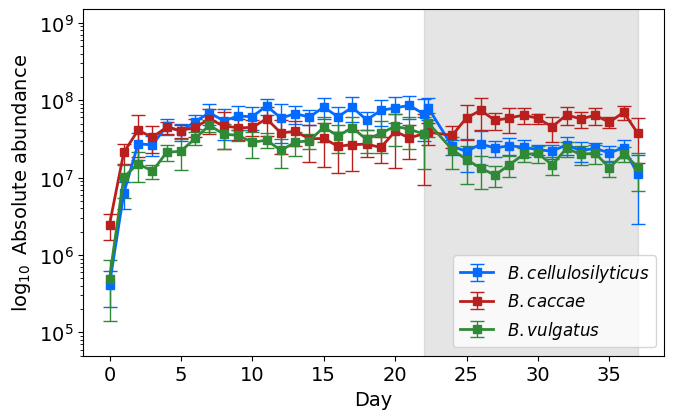

In [24]:
plt.figure(figsize=(7.5, 4.5))
c=0
for s in sp_order:
    plt.errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=5, label=order[c], linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=2)
    c+=1
plt.fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc=0, fontsize=12)
plt.ylim(5e4, 1.5e9)
plt.xlabel('Day')
plt.ylabel('$\log_{10}$ Absolute abundance')
plt.yscale('log')
plt.show()

# Forward Simulate

In [25]:
lf0_mean = np.load('reyes-datasets/base_mean_lf0.npy')
lf0_std = np.load('reyes-datasets/base_std_lf0.npy')
lf0_median = np.load('reyes-datasets/base_median_lf0.npy')
lf0_cl = np.load('reyes-datasets/base_cl_lf0.npy')
lf0_times = np.load('reyes-datasets/times_lf0.npy')

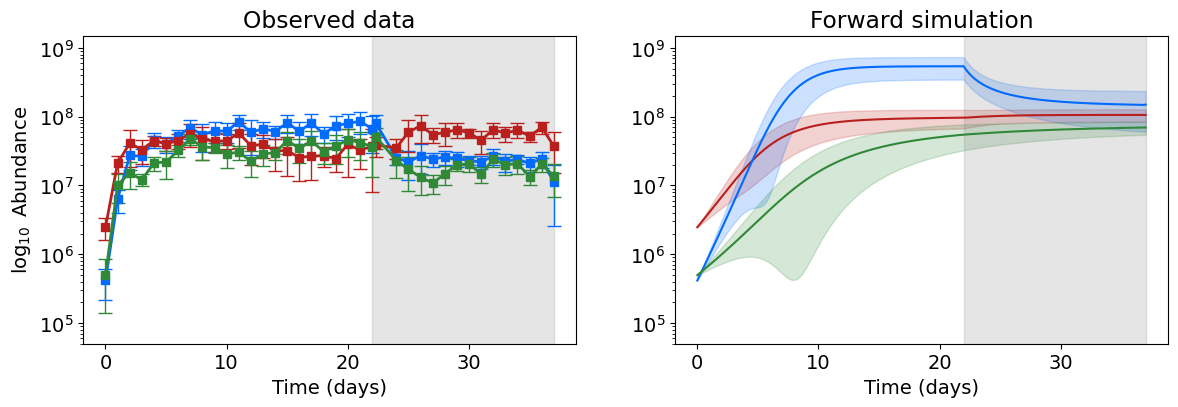

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[1].plot(lf0_times, lf0_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[1])
ax[1].fill_between(lf0_times, lf0_mean[0] - lf0_std[0], lf0_mean[0] + lf0_std[0], alpha=0.2, color=cmap3[1])
ax[1].plot(lf0_times, lf0_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[0])
ax[1].fill_between(lf0_times, lf0_mean[1] - lf0_std[1], lf0_mean[1] + lf0_std[1], alpha=0.2, color=cmap3[0])
ax[1].plot(lf0_times, lf0_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax[1].fill_between(lf0_times, lf0_mean[5] - lf0_std[5], lf0_mean[5] + lf0_std[5], alpha=0.2, color=cmap3[2])
c=0
for s in sp_order:
    ax[0].errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=5, linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=2)
    c += 1
# ax.legend(fontsize=16)
ax[0].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[1].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim([5e4,1.5e9])
ax[1].set_ylim([5e4,1.5e9])
ax[0].set_title('Observed data')
ax[1].set_title('Forward simulation')
ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[0].set_ylabel('$\log_{10}$ Abundance')
# fig.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()

## HF0 parameters

In [27]:
hf0_mean = np.load('reyes-datasets/base_mean_hf0.npy')
hf0_std = np.load('reyes-datasets/base_std_hf0.npy')
hf0_median = np.load('reyes-datasets/base_median_hf0.npy')
hf0_cl = np.load('reyes-datasets/base_cl_hf0.npy')
hf0_times = np.load('reyes-datasets/times_hf0.npy')

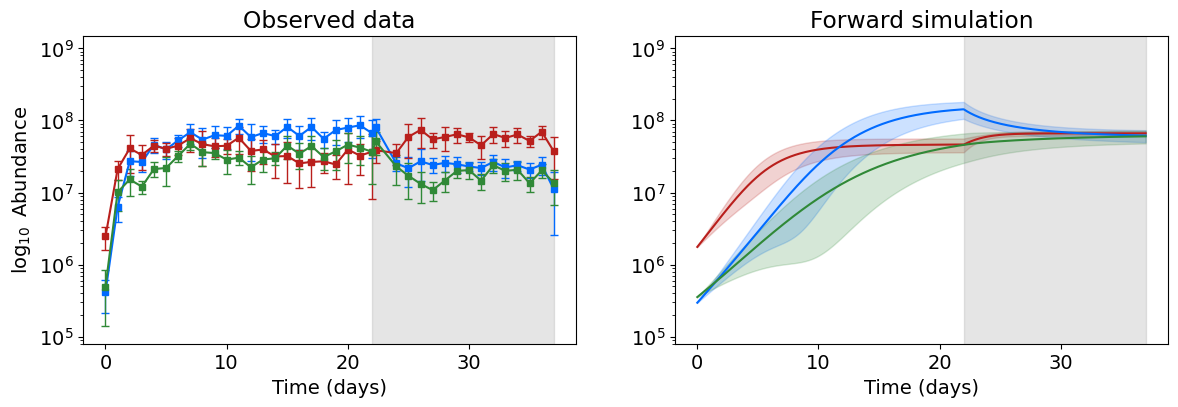

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[1].plot(hf0_times, hf0_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[1])
ax[1].fill_between(hf0_times, hf0_mean[0] - hf0_std[0], hf0_mean[0] + hf0_std[0], alpha=0.2, color=cmap3[1])
ax[1].plot(hf0_times, hf0_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[0])
ax[1].fill_between(hf0_times, hf0_mean[1] - hf0_std[1], hf0_mean[1] + hf0_std[1], alpha=0.2, color=cmap3[0])
ax[1].plot(hf0_times, hf0_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax[1].fill_between(hf0_times, hf0_mean[5] - hf0_std[5], hf0_mean[5] + hf0_std[5], alpha=0.2, color=cmap3[2])
c=0
for s in sp_order:
    ax[0].errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=3, linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=1.5,
                    markersize=4)
    c += 1
# ax.legend(fontsize=16)
ax[0].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[1].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[0].set_ylim([8e4,1.5e9])
ax[1].set_ylim([8e4,1.5e9])
ax[0].set_title('Observed data')
ax[1].set_title('Forward simulation')
ax[0].set_xlabel('Time (days)')
ax[1].set_xlabel('Time (days)')
ax[0].set_ylabel('$\log_{10}$ Abundance')
# fig.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()

# Full vis

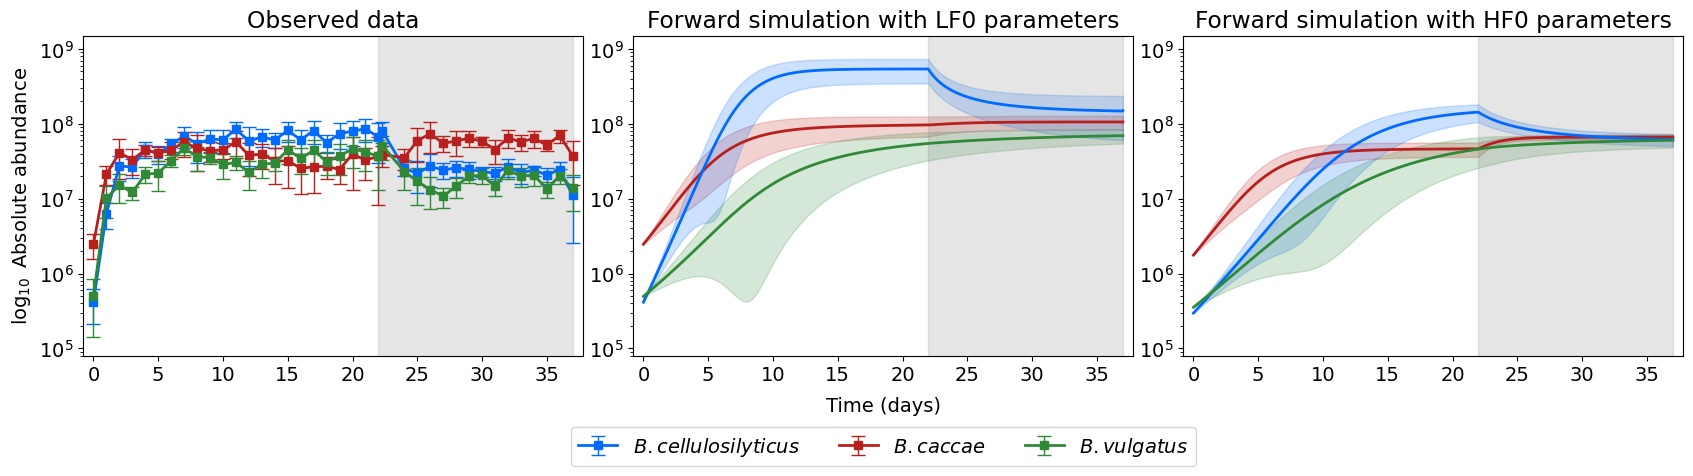

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
c=0
for s in sp_order:
    ax[0].errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=5, linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=2,
                    label=order[c])
    c += 1
ax[1].plot(lf0_times, lf0_mean[0], lw=2, c=cmap3[1], linestyle='-')
ax[1].fill_between(lf0_times, lf0_mean[0] - lf0_std[0], lf0_mean[0] + lf0_std[0], alpha=0.2, color=cmap3[1])
ax[1].plot(lf0_times, lf0_mean[1], lw=2, c=cmap3[0], linestyle='-')
ax[1].fill_between(lf0_times, lf0_mean[1] - lf0_std[1], lf0_mean[1] + lf0_std[1], alpha=0.2, color=cmap3[0])
ax[1].plot(lf0_times, lf0_mean[5], lw=2, c=cmap3[2], linestyle='-')
ax[1].fill_between(lf0_times, lf0_mean[5] - lf0_std[5], lf0_mean[5] + lf0_std[5], alpha=0.2, color=cmap3[2])
ax[2].plot(hf0_times, hf0_mean[0], lw=2, c=cmap3[1], linestyle='-')
ax[2].fill_between(hf0_times, hf0_mean[0] - hf0_std[0], hf0_mean[0] + hf0_std[0], alpha=0.2, color=cmap3[1])
ax[2].plot(hf0_times, hf0_mean[1], lw=2, c=cmap3[0], linestyle='-')
ax[2].fill_between(hf0_times, hf0_mean[1] - hf0_std[1], hf0_mean[1] + hf0_std[1], alpha=0.2, color=cmap3[0])
ax[2].plot(hf0_times, hf0_mean[5], lw=2, c=cmap3[2], linestyle='-')
ax[2].fill_between(hf0_times, hf0_mean[5] - hf0_std[5], hf0_mean[5] + hf0_std[5], alpha=0.2, color=cmap3[2])
ax[0].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[1].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[2].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
# ax[0].legend(loc=0, fontsize=12)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_ylim([8e4,1.5e9])
ax[1].set_ylim([8e4,1.5e9])
ax[2].set_ylim([8e4,1.5e9])
ax[0].set_xlim([-0.8,37.8])
ax[1].set_xlim([-0.8,37.8])
ax[2].set_xlim([-0.8,37.8])
ax[0].set_title('Observed data')
ax[1].set_title('Forward simulation with LF0 parameters')
ax[2].set_title('Forward simulation with HF0 parameters')
# ax[0].set_xlabel('Time (days)')
# ax[1].set_xlabel('Time (days)')
# ax[2].set_xlabel('Time (days)')
ax[0].set_ylabel('$\log_{10}$ Absolute abundance')
fig.supxlabel('Time (days)', y=-0.05, fontsize=14)
# fig.supylabel('$\log_{10}$ Absolute abundance', x=0.09)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=14)
# fig.legend(loc='upper center', bbox_to_anchor=(0.8, 0.95), ncol=3, fontsize=12)
# fig.supylabel('$\log_{10}$ Abundance', x=0.09)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.2)
fig.savefig('mcnulty-results/3sp_trajectories.svg', bbox_inches='tight')
plt.show()

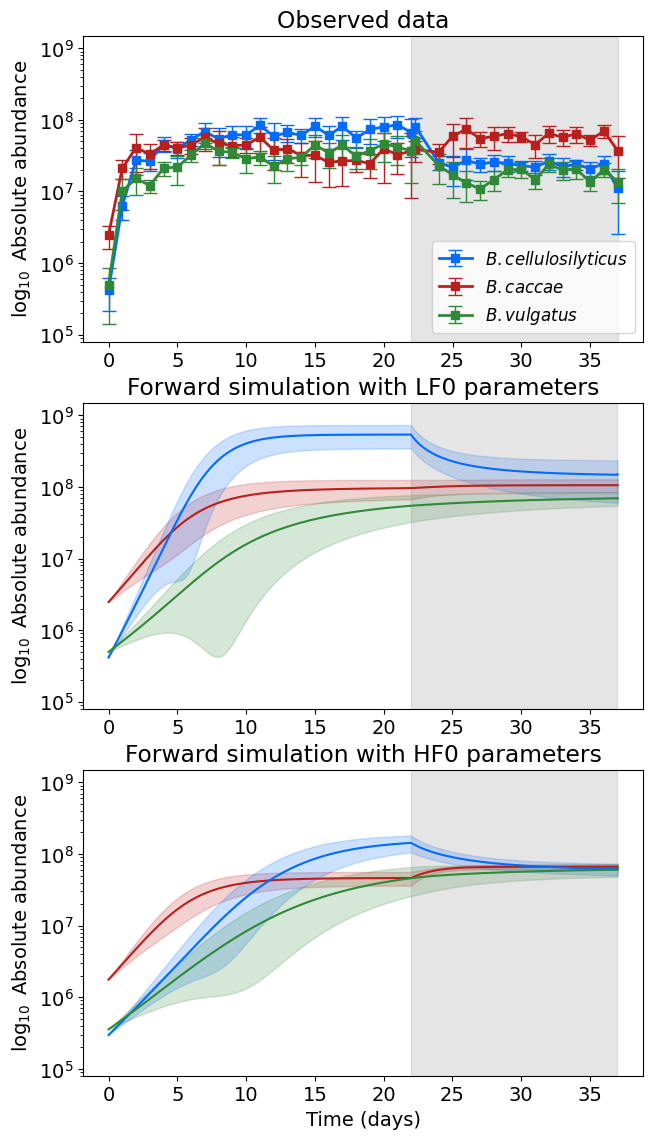

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(7, 13))
c=0
for s in sp_order:
    ax[0].errorbar(master_table_mean[master_table_mean['Species'] == s]['Day'],
                    master_table_mean[master_table_mean['Species'] == s]['Absolute_abundance'],
                    yerr=master_table_std[master_table_std['Species'] == s]['Absolute_abundance'],
                    fmt='s', capsize=5, linestyle='-', elinewidth=1, color=cmap3[c], markeredgewidth=1, linewidth=2,
                    label=order[c])
    c += 1
ax[1].plot(lf0_times, lf0_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[1])
ax[1].fill_between(lf0_times, lf0_mean[0] - lf0_std[0], lf0_mean[0] + lf0_std[0], alpha=0.2, color=cmap3[1])
ax[1].plot(lf0_times, lf0_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[0])
ax[1].fill_between(lf0_times, lf0_mean[1] - lf0_std[1], lf0_mean[1] + lf0_std[1], alpha=0.2, color=cmap3[0])
ax[1].plot(lf0_times, lf0_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax[1].fill_between(lf0_times, lf0_mean[5] - lf0_std[5], lf0_mean[5] + lf0_std[5], alpha=0.2, color=cmap3[2])
ax[2].plot(hf0_times, hf0_mean[0], label='$B. caccae$', lw=1.5, c=cmap3[1])
ax[2].fill_between(hf0_times, hf0_mean[0] - hf0_std[0], hf0_mean[0] + hf0_std[0], alpha=0.2, color=cmap3[1])
ax[2].plot(hf0_times, hf0_mean[1], label='$B. cellulosilyticus$ WH2', lw=1.5, c=cmap3[0])
ax[2].fill_between(hf0_times, hf0_mean[1] - hf0_std[1], hf0_mean[1] + hf0_std[1], alpha=0.2, color=cmap3[0])
ax[2].plot(hf0_times, hf0_mean[5], label='$B. vulgatus$', lw=1.5, c=cmap3[2])
ax[2].fill_between(hf0_times, hf0_mean[5] - hf0_std[5], hf0_mean[5] + hf0_std[5], alpha=0.2, color=cmap3[2])
ax[0].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[1].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[2].fill_between(x=[22,37], y1=1, y2=1e12, color='grey', alpha=0.2)
ax[0].legend(loc=0, fontsize=12)
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_ylim([8e4,1.5e9])
ax[1].set_ylim([8e4,1.5e9])
ax[2].set_ylim([8e4,1.5e9])
ax[0].set_title('Observed data')
ax[1].set_title('Forward simulation with LF0 parameters')
ax[2].set_title('Forward simulation with HF0 parameters')
# ax[0].set_xlabel('Time (days)')
# ax[1].set_xlabel('Time (days)')
ax[2].set_xlabel('Time (days)')
ax[0].set_ylabel('$\log_{10}$ Absolute abundance')
ax[1].set_ylabel('$\log_{10}$ Absolute abundance')
ax[2].set_ylabel('$\log_{10}$ Absolute abundance')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.2)
# fig.savefig('mcnulty-results/mcnulty-LF0-seed96/keystoneness-individual/trajectories.svg', bbox_inches='tight')
plt.show()